#**IMPORT THE LIBRARIES**





In [121]:
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

#**IMPORT THE DATA**


In [2]:
from google.colab import files
uploaded=files.upload()

Saving takehome_user_engagement.csv to takehome_user_engagement.csv


In [3]:
from google.colab import files
uploaded=files.upload()

Saving takehome_users.csv to takehome_users.csv


In [4]:
df=pd.read_csv('takehome_user_engagement.csv')

In [5]:
df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [6]:
#Let us check to type of time_stamp
df.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [7]:
#Let us check if there are duplicate rows
df[df.duplicated()==True]

,time_stamp,user_id,visited


In [8]:
#Let us convert "time_stamp" to date_time
df['time_stamp']=pd.to_datetime(df['time_stamp'])
df.set_index('time_stamp', inplace=True)
df.dtypes

user_id    int64
visited    int64
dtype: object

In [9]:

df.dtypes

user_id    int64
visited    int64
dtype: object

In [10]:
df.shape

(207917, 2)

In [11]:
#We will sort the value by 'time_stamp'
df=df.sort_values(by=['time_stamp'])
df.head()

,user_id,visited
time_stamp,,
2012-05-31 08:20:06,10012,1
2012-05-31 15:47:36,3428,1
2012-05-31 17:19:37,9899,1
2012-05-31 21:58:33,1693,1
2012-06-01 00:17:30,6102,1


In [12]:
#Let us check if there are duplicate rows
df[df.duplicated()==True]

,user_id,visited
time_stamp,,
2012-06-04 00:28:47,3514,1
2012-06-04 06:23:51,7170,1
2012-06-05 16:44:54,2568,1
2012-06-05 21:58:33,1693,1
2012-06-06 20:33:31,6047,1
...,...,...
2014-06-04 23:30:50,7859,1
2014-06-04 23:32:13,4625,1
2014-06-04 23:34:04,9325,1


It looks like the data have a lot of duplicated values, but as we can see there are not identical rows in this data.

In [13]:
#We group our data by 'user_id' and group rows by week (Here we use resample() to do that.). This will gives us the weekly number of visit of each user.
df_group= df.groupby('user_id').resample('1W').sum()

In [14]:
df_group.head(40)

user_id  visited
user_id time_stamp                  
1       2014-04-27        1        1
2       2013-11-17        2        1
        2013-11-24        0        0
        2013-12-01        2        1
        2013-12-08        0        0
        2013-12-15        2        1
        2013-12-22        0        0
        2013-12-29        2        1
        2014-01-05        2        1
        2014-01-12        2        1
        2014-01-19        0        0
        2014-01-26        0        0
        2014-02-02        0        0
        2014-02-09        6        3
        2014-02-16        4        2
        2014-02-23        0        0
        2014-03-02        0        0
        2014-03-09        2        1
        2014-03-16        2        1
        2014-03-23        0        0
        2014-03-30        0        0
        2014-04-06        2        1
3       2013-03-24        3        1
4       2013-05-26        4        1
5       2013-01-27        5        1
6       2013-12-22        6        1
7       2012-12-23        7        1
10      2013-01-20       10        1
        2013-01-27       10        1
        2013-02-03       10        1
        2013-02-10       20        2
        2013-02-17       20        2
        2013-02-24       10        1
        2013-03-03       30        3
        2013-03-10       20        2
        2013-03-17       20        2
        2013-03-24       20        2
        2013-03-31       10        1
        2013-04-07       10        1
        2013-04-14       30        3

In [15]:
df_group.shape
len(df_group)

82282

In [16]:
#let us drop 'user_id'
df_group=df_group.drop(columns='user_id', axis=1)

In [17]:
df_group.head()

visited
user_id time_stamp         
1       2014-04-27        1
2       2013-11-17        1
        2013-11-24        0
        2013-12-01        1
        2013-12-08        0

In [18]:
#Let us create a column called 'adopted_user' and set it to zero
df_group['adopted_user']=0

In [19]:
df_group.head()

visited  adopted_user
user_id time_stamp                       
1       2014-04-27        1             0
2       2013-11-17        1             0
        2013-11-24        0             0
        2013-12-01        1             0
        2013-12-08        0             0

In [20]:
#Let put the correct value into the 'adopted_user' column
for i in range(len(df_group)-1):
  if df_group['visited'].iloc[i]<3:
    df_group['adopted_user'].iloc[i]=0
  else:
    df_group['adopted_user'].iloc[i]=1

In [21]:
df_group.head(40)

visited  adopted_user
user_id time_stamp                       
1       2014-04-27        1             0
2       2013-11-17        1             0
        2013-11-24        0             0
        2013-12-01        1             0
        2013-12-08        0             0
        2013-12-15        1             0
        2013-12-22        0             0
        2013-12-29        1             0
        2014-01-05        1             0
        2014-01-12        1             0
        2014-01-19        0             0
        2014-01-26        0             0
        2014-02-02        0             0
        2014-02-09        3             1
        2014-02-16        2             0
        2014-02-23        0             0
        2014-03-02        0             0
        2014-03-09        1             0
        2014-03-16        1             0
        2014-03-23        0             0
        2014-03-30        0             0
        2014-04-06        1             0
3       2013-03-24        1             0
4       2013-05-26        1             0
5       2013-01-27        1             0
6       2013-12-22        1             0
7       2012-12-23        1             0
10      2013-01-20        1             0
        2013-01-27        1             0
        2013-02-03        1             0
        2013-02-10        2             0
        2013-02-17        2             0
        2013-02-24        1             0
        2013-03-03        3             1
        2013-03-10        2             0
        2013-03-17        2             0
        2013-03-24        2             0
        2013-03-31        1             0
        2013-04-07        1             0
        2013-04-14        3             1

In [22]:
#We delete the time_stamp index
df_group=df_group.reset_index(level=1, drop=True)

In [23]:
#we create a column named 'object_id' which is the same as the index
#The goal of this is to have a column in this table that will match which the column 'object_id' in the other table we are about to load
#This will help us merge the two data easily
df_index=df_group
df_index['object_id']=df_group.index

In [24]:
df_index.head()

,visited,adopted_user,object_id
user_id,,,
1,1,0,1
2,1,0,2
2,0,0,2
2,1,0,2
2,0,0,2


In [ ]:
#Let us put the column 'adopted_user' we have created into the 'takehome_users' table
#But before doing that let us load the data for that table

In [25]:
data=pd.read_csv('takehome_users.csv', engine='python')

In [26]:
data.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,4/22/2014 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,3/19/2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,5/21/2013 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,1/17/2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [80]:
#Let us merge our two table
df_merge=pd.merge(df_group, data, on='object_id', how='left')

In [81]:
df_merge.head()

,visited,adopted_user,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,0,1,4/22/2014 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,1,0,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,0,0,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,1,0,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
4,0,0,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0


In [82]:
df_merge.dtypes

visited                         int64
adopted_user                    int64
object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

# **DATA WRANGLING**

In [83]:
#we check the name of the columns
df_merge.columns

Index(['visited', 'adopted_user', 'object_id', 'creation_time', 'name',
       'email', 'creation_source', 'last_session_creation_time',
       'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'invited_by_user_id'],
      dtype='object')

In [84]:
#We check the columns type
df_merge.dtypes

visited                         int64
adopted_user                    int64
object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [85]:
#Let us find more information about our columns
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82282 entries, 0 to 82281
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   visited                     82282 non-null  int64  
 1   adopted_user                82282 non-null  int64  
 2   object_id                   82282 non-null  int64  
 3   creation_time               82282 non-null  object 
 4   name                        82282 non-null  object 
 5   email                       82282 non-null  object 
 6   creation_source             82282 non-null  object 
 7   last_session_creation_time  82282 non-null  float64
 8   opted_in_to_mailing_list    82282 non-null  int64  
 9   enabled_for_marketing_drip  82282 non-null  int64  
 10  org_id                      82282 non-null  int64  
 11  invited_by_user_id          46274 non-null  float64
dtypes: float64(2), int64(6), object(4)
memory usage: 8.2+ MB


In [86]:
#Let us print the percent of each feature that is missing
nas=pd.DataFrame(df_merge.isnull().sum().sort_values(ascending=False)/len(df_merge),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
invited_by_user_id,0.437617


In [87]:
#SInce we cannot really identify which user invited the subject user to join, we will drop the column 'invited_by_user_id'
df_merge=df_merge.drop('invited_by_user_id', axis=1)
df_merge.head()

,visited,adopted_user,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id
0,1,0,1,4/22/2014 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11
1,1,0,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1
2,0,0,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1
3,1,0,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1
4,0,0,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1


In [88]:
#Let us recheck again to see if there is any missing data
df_merge.isnull().sum()

visited                       0
adopted_user                  0
object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
dtype: int64

In [89]:
#Let us convert the column 'creation_time' to datetime
df_merge['creation_time']=pd.to_datetime(df_merge['creation_time'])

In [90]:
#We sort the data by 'creation_time'
df_merge=df_merge.sort_values(by=['creation_time'])
df_merge.head()

,visited,adopted_user,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id
26520,1,0,3861,2012-05-31 00:43:00,Jensen Stine,StineAJensen@yahoo.com,ORG_INVITE,1.338684e+09,0,0,115
78854,1,0,11430,2012-05-31 01:42:00,Wood Levi,LeviWood@hotmail.com,ORG_INVITE,1.338515e+09,0,0,239
49626,1,0,7170,2012-05-31 06:23:00,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,1.345444e+09,0,0,145
49632,0,0,7170,2012-05-31 06:23:00,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,1.345444e+09,0,0,145
49631,0,0,7170,2012-05-31 06:23:00,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,1.345444e+09,0,0,145


In [91]:
#We reset the index
df_merge=df_merge.reset_index(drop=True)
df_merge 

,visited,adopted_user,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id
0,1,0,3861,2012-05-31 00:43:00,Jensen Stine,StineAJensen@yahoo.com,ORG_INVITE,1.338684e+09,0,0,115
1,1,0,11430,2012-05-31 01:42:00,Wood Levi,LeviWood@hotmail.com,ORG_INVITE,1.338515e+09,0,0,239
2,1,0,7170,2012-05-31 06:23:00,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,1.345444e+09,0,0,145
3,0,0,7170,2012-05-31 06:23:00,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,1.345444e+09,0,0,145
4,0,0,7170,2012-05-31 06:23:00,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,1.345444e+09,0,0,145
...,...,...,...,...,...,...,...,...,...,...,...
82277,1,0,6945,2014-05-30 23:10:00,Sandoval Matthew,MatthewKSandoval@cuvox.de,SIGNUP,1.401578e+09,0,0,5
82278,1,0,9688,2014-05-30 23:12:00,Coveny Taj,TajCoveny@yahoo.com,GUEST_INVITE,1.401664e+09,0,0,93
82279,1,0,10164,2014-05-30 23:27:00,Walsh Sam,SamWalsh@jourrapide.com,GUEST_INVITE,1.401492e+09,0,0,302
82280,1,0,3490,2014-05-30 23:45:00,Oliveira Estevan,EstevanRochaOliveira@gmail.com,PERSONAL_PROJECTS,1.401580e+09,0,0,31


In [92]:
#Let us create a column called 'days' which capture the number of days from the first 'creation_time'
df_merge['days']=0
for i in range(len(df_merge)):
    df_merge['days'].iloc[i]=df_merge['creation_time'].iloc[i]-df_merge['creation_time'].iloc[0]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [93]:
df_merge.head()

,visited,adopted_user,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,days
0,1,0,3861,2012-05-31 00:43:00,Jensen Stine,StineAJensen@yahoo.com,ORG_INVITE,1.338684e+09,0,0,115,0 days 00:00:00
1,1,0,11430,2012-05-31 01:42:00,Wood Levi,LeviWood@hotmail.com,ORG_INVITE,1.338515e+09,0,0,239,0 days 00:59:00
2,1,0,7170,2012-05-31 06:23:00,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,1.345444e+09,0,0,145,0 days 05:40:00
3,0,0,7170,2012-05-31 06:23:00,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,1.345444e+09,0,0,145,0 days 05:40:00
4,0,0,7170,2012-05-31 06:23:00,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,1.345444e+09,0,0,145,0 days 05:40:00


In [94]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82282 entries, 0 to 82281
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   visited                     82282 non-null  int64         
 1   adopted_user                82282 non-null  int64         
 2   object_id                   82282 non-null  int64         
 3   creation_time               82282 non-null  datetime64[ns]
 4   name                        82282 non-null  object        
 5   email                       82282 non-null  object        
 6   creation_source             82282 non-null  object        
 7   last_session_creation_time  82282 non-null  float64       
 8   opted_in_to_mailing_list    82282 non-null  int64         
 9   enabled_for_marketing_drip  82282 non-null  int64         
 10  org_id                      82282 non-null  int64         
 11  days                        82282 non-null  object    

In [95]:
df_merge['days']= df_merge['days'].astype('timedelta64[D]')

In [96]:
df_merge.head()

,visited,adopted_user,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,days
0,1,0,3861,2012-05-31 00:43:00,Jensen Stine,StineAJensen@yahoo.com,ORG_INVITE,1.338684e+09,0,0,115,0 days
1,1,0,11430,2012-05-31 01:42:00,Wood Levi,LeviWood@hotmail.com,ORG_INVITE,1.338515e+09,0,0,239,0 days
2,1,0,7170,2012-05-31 06:23:00,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,1.345444e+09,0,0,145,0 days
3,0,0,7170,2012-05-31 06:23:00,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,1.345444e+09,0,0,145,0 days
4,0,0,7170,2012-05-31 06:23:00,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,1.345444e+09,0,0,145,0 days


In [97]:
df_merge['days']

0         0 days
1         0 days
2         0 days
3         0 days
4         0 days
          ...   
82277   729 days
82278   729 days
82279   729 days
82280   729 days
82281   729 days
Name: days, Length: 82282, dtype: timedelta64[ns]

In [98]:
#Convert 'days' column into float
df_merge['days']=df_merge['days'].astype(int)/10**9

In [103]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82282 entries, 0 to 82281
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   visited                     82282 non-null  int64         
 1   adopted_user                82282 non-null  int64         
 2   object_id                   82282 non-null  int64         
 3   creation_time               82282 non-null  datetime64[ns]
 4   name                        82282 non-null  object        
 5   email                       82282 non-null  object        
 6   creation_source             82282 non-null  object        
 7   last_session_creation_time  82282 non-null  float64       
 8   opted_in_to_mailing_list    82282 non-null  int64         
 9   enabled_for_marketing_drip  82282 non-null  int64         
 10  org_id                      82282 non-null  int64         
 11  days                        82282 non-null  float64   

In [104]:
#Let us drop the column 'creation_time'
df_merge=df_merge.drop(['creation_time'], axis=1)

#**EXPLORATORY DATA ANALYSIS**

In [105]:
#Let us print the summary statistic
df_merge.describe().T

,count,mean,std,min,25%,50%,75%,max
visited,82282.0,2.526883e+00,2.167316e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,7.000000e+00
adopted_user,82282.0,4.114995e-01,4.921083e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
object_id,82282.0,5.957504e+03,3.438221e+03,1.000000e+00,3.066000e+03,5.830000e+03,8.957000e+03,1.200000e+04
last_session_creation_time,82282.0,1.396009e+09,1.292009e+07,1.338452e+09,1.400607e+09,1.401408e+09,1.401842e+09,1.402067e+09
opted_in_to_mailing_list,82282.0,2.575290e-01,4.372758e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
enabled_for_marketing_drip,82282.0,1.577988e-01,3.645544e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
org_id,82282.0,1.602695e+02,1.212391e+02,0.000000e+00,5.500000e+01,1.390000e+02,2.570000e+02,4.160000e+02
days,82282.0,2.488153e+07,1.681361e+07,0.000000e+00,1.036800e+07,2.263680e+07,3.792960e+07,6.298560e+07


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7ec654c50>,
      dtype=object)

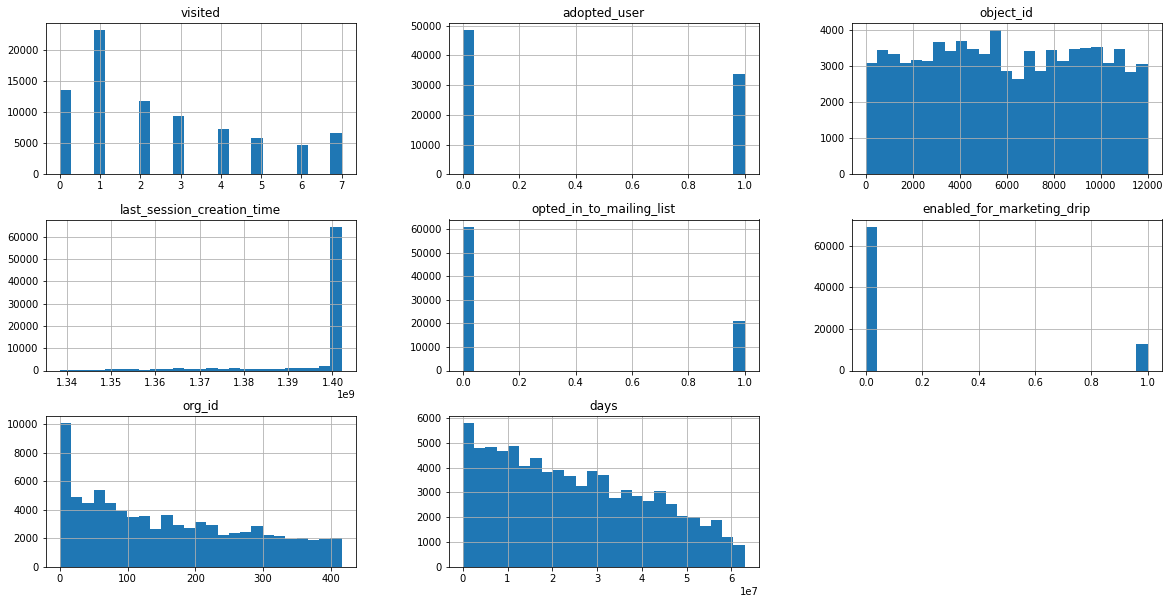

In [106]:
#Let us print histograms for each numeric features in our data
df_merge.hist(bins=25, figsize=(20,10))

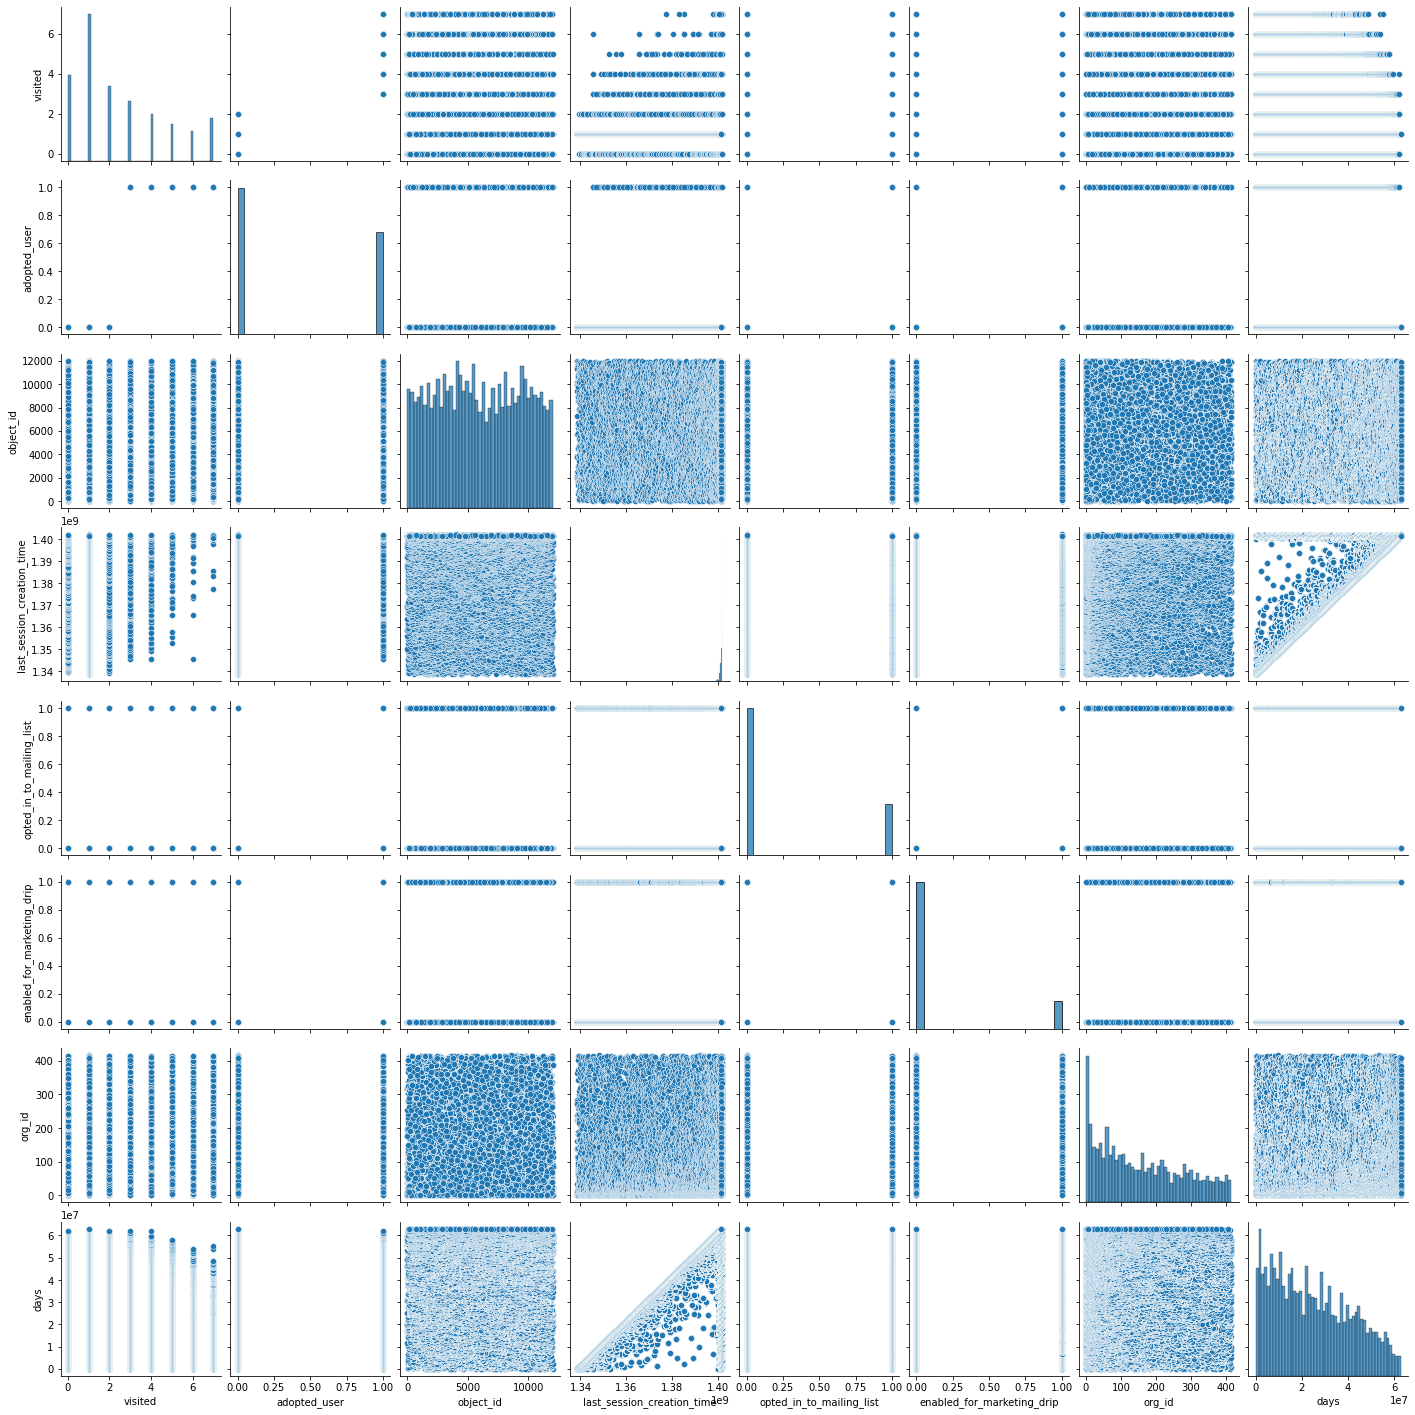

In [107]:
pplots=sns.pairplot(df_merge)

In [108]:
#Calculate the correlation coefficients
corr =df_merge.corr(method='pearson')
#plot it in the next line
corr.round(2).style.background_gradient(cmap='coolwarm')

,visited,adopted_user,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,days
visited,1.000000,0.860000,-0.010000,0.310000,0.000000,-0.010000,0.040000,-0.350000
adopted_user,0.860000,1.000000,-0.010000,0.320000,0.000000,-0.020000,0.030000,-0.310000
object_id,-0.010000,-0.010000,1.000000,-0.010000,-0.030000,-0.030000,-0.020000,0.030000
last_session_creation_time,0.310000,0.320000,-0.010000,1.000000,0.000000,0.000000,0.040000,0.120000
opted_in_to_mailing_list,0.000000,0.000000,-0.030000,0.000000,1.000000,0.500000,-0.030000,0.000000
enabled_for_marketing_drip,-0.010000,-0.020000,-0.030000,0.000000,0.500000,1.000000,-0.030000,-0.020000
org_id,0.040000,0.030000,-0.020000,0.040000,-0.030000,-0.030000,1.000000,-0.030000
days,-0.350000,-0.310000,0.030000,0.120000,0.000000,-0.020000,-0.030000,1.000000


In [109]:
#Let us drop all the object feature
df_drop=df_merge.drop(['name',	'email',	'creation_source'], axis=1)

# **Pre-Processing and Training Data Development**

In [ ]:
#Let us create dummy features for categorical variables
dfo=df_merge.select_dtypes(include=['object']) #select object type columns
df1=pd.concat([df_merge.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)
df1.columns

Index(['visited', 'adopted_user', 'object_id', 'creation_time',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'name_Aachen Frank',
       'name_Aachen Klaus',
       ...
       'email_zssimlrf@ydtkr.com', 'email_ztusfujm@ieunf.com',
       'email_zxswdasp@swhrr.com', 'email_zyxoffkk@vxdvt.com',
       'email_zzxqnoiy@vhugu.com', 'creation_source_GUEST_INVITE',
       'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS',
       'creation_source_SIGNUP', 'creation_source_SIGNUP_GOOGLE_AUTH'],
      dtype='object', length=17273)

In [110]:
df_drop.head()

,visited,adopted_user,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,days
0,1,0,3861,1.338684e+09,0,0,115,0.0
1,1,0,11430,1.338515e+09,0,0,239,0.0
2,1,0,7170,1.345444e+09,0,0,145,0.0
3,0,0,7170,1.345444e+09,0,0,145,0.0
4,0,0,7170,1.345444e+09,0,0,145,0.0


In [111]:
# X is our prodictor variable
X=df_drop.drop(['adopted_user'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82282 entries, 0 to 82281
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   visited                     82282 non-null  int64  
 1   object_id                   82282 non-null  int64  
 2   last_session_creation_time  82282 non-null  float64
 3   opted_in_to_mailing_list    82282 non-null  int64  
 4   enabled_for_marketing_drip  82282 non-null  int64  
 5   org_id                      82282 non-null  int64  
 6   days                        82282 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 4.4 MB


In [112]:
# y is our target variable which is the 'adopted_user' column
y=df_merge['adopted_user']

In [117]:
#Let us flatenned our variable y by calling the ravel() function on y
y=y.ravel()

In [113]:
from sklearn import preprocessing

In [114]:
# we use the StandardScaler() method of the preprocessing package
# and call the fit() mehtod with X as parameter.
scaler = preprocessing.StandardScaler().fit(X)

In [115]:
# We declare a variable called X_scaled 
X_scaled=scaler.transform(X)

In [119]:
#Let us split our data into training and testing
X_train, X_test, y_train, y_test=train_test_split(X_scaled,y, test_size=0.2, random_state=1, stratify=y)

#**MODELING**

In [122]:
#We will use sklearn logistic regression to fit the model on our training data
cls=LogisticRegression()
cls.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

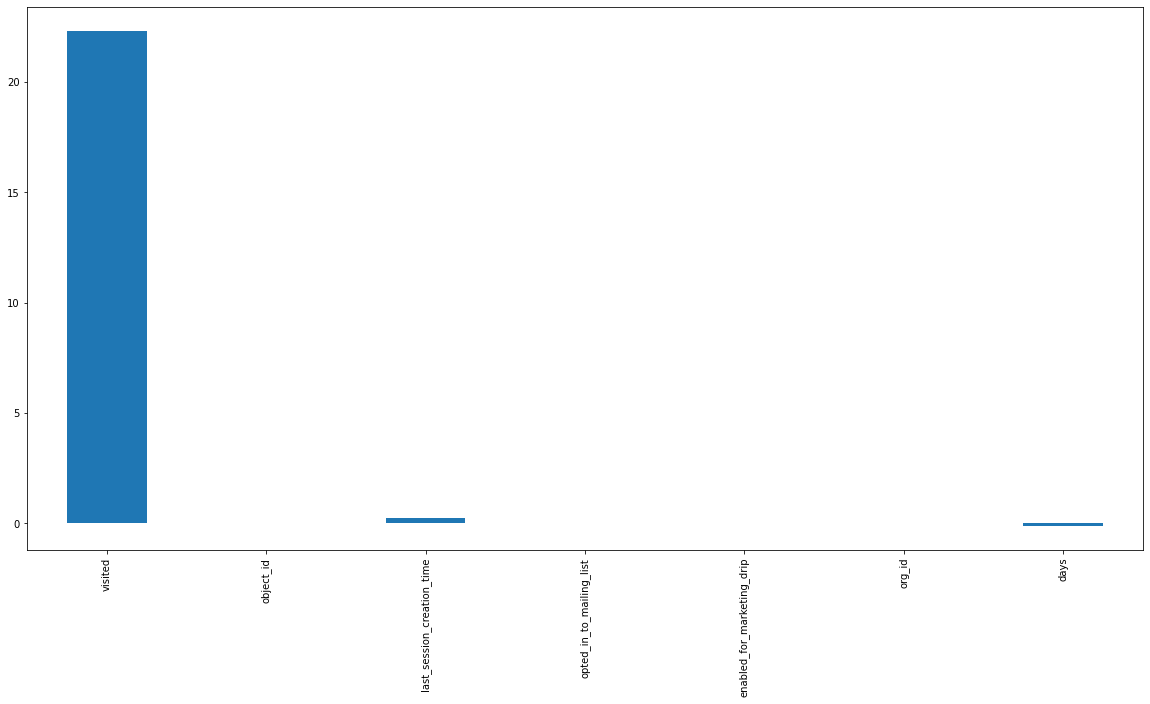

In [124]:
#Let us plot the coeficient of our model
X_train_pd=pd.DataFrame(data=X_train, index=None, columns=['visited',	'object_id',	'last_session_creation_time',	'opted_in_to_mailing_list',	'enabled_for_marketing_drip',	'org_id',	'days'])
coefs=pd.Series(cls.coef_[0], index=X_train_pd.columns)
plt.figure(figsize=(20,10))
coefs.plot(kind='bar')

##**The plot of coefficient shows us that the column 'visited' is the major factor predicting 'adopted_user' values.**

In [129]:
#Let us see the coefficient
#coef=coefs.sort_values(by=['Coefficient'],ascending=False)
coefs

visited                       22.293129
object_id                      0.021829
last_session_creation_time     0.219712
opted_in_to_mailing_list      -0.002345
enabled_for_marketing_drip    -0.017776
org_id                        -0.007197
days                          -0.115261
dtype: float64

In [128]:
Almost all the other predictors are almost negligeable compare to the predictor 'visited' since their coefficient is almost zero but 22.29 for the 'visited' factor.

pandas.core.series.Series

## **Almost all the other predictors are almost negligeable compare to the predictor 'visited' since their coefficient is almost zero but 22.29 for the 'visited' factor.**